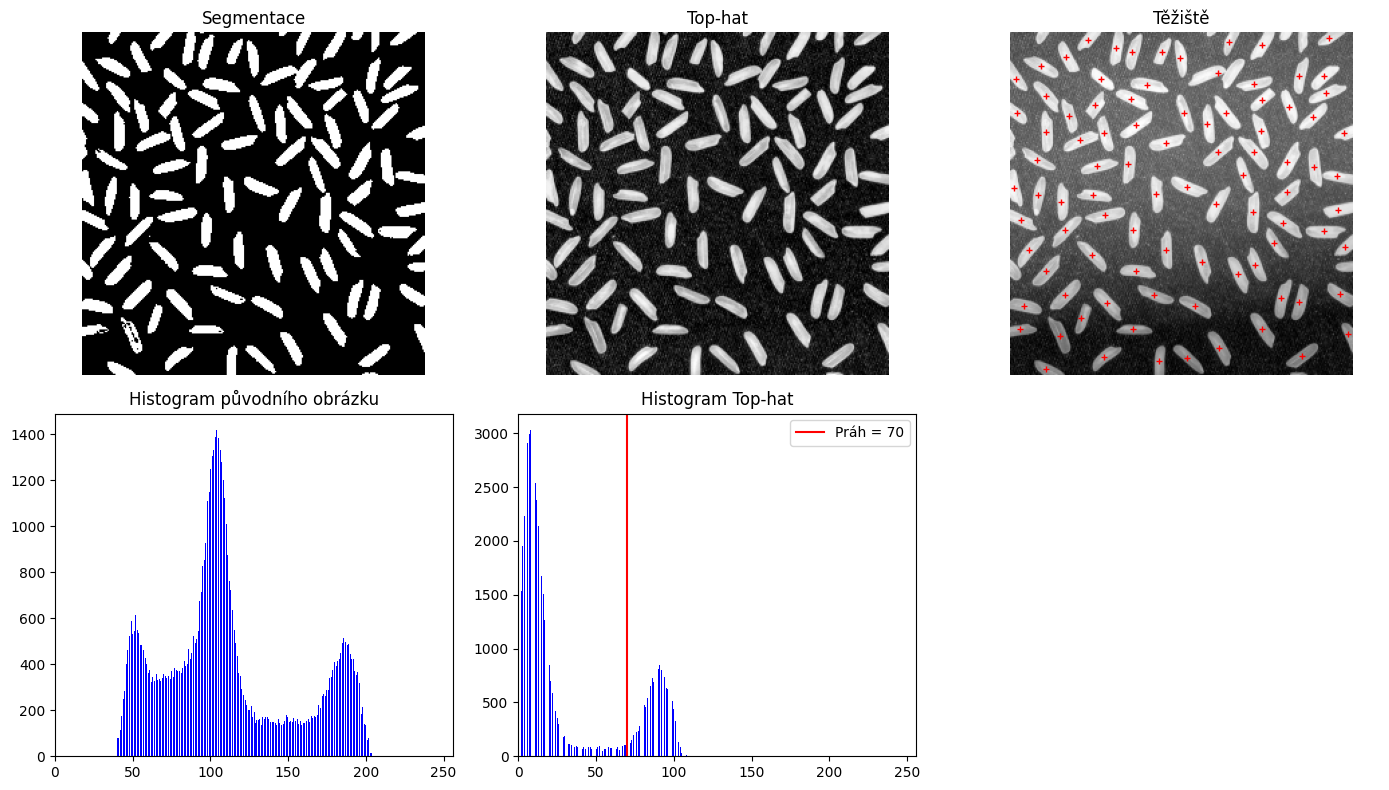

Počet zrníček rýže na top-hat obrazu: 91


In [ ]:
# mady by Martin "Granc3k" Šimon
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load obrázku
img = cv2.imread("./data/cv09_rice.bmp", cv2.IMREAD_GRAYSCALE)

# Top-hat předzpracování
se = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE, (21, 21)
)  # ekvivalent strel('disk',10)
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, se)

# Segmentace pomocí ručně voleného prahu (můžeš upravit dle potřeby)
threshold = 70
segm = np.zeros_like(tophat_img, dtype=np.uint8)
segm[tophat_img >= threshold] = 1

# Identifikace objektů a calc těžišť
num_labels, labels = cv2.connectedComponents(segm, connectivity=4)

# Coords těžišť validních objektů
min_area = 90
xT, yT = [], []
valid_labels = 0

for label in range(1, num_labels):  # 0 je pozadí
    mask = (labels == label).astype(np.uint8)

    if cv2.countNonZero(mask) < min_area:
        continue

    M = cv2.moments(mask)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        xT.append(cx)
        yT.append(cy)
        valid_labels += 1

# Finální print
rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(14, 8))

# Segmentace
axs[0, 0].imshow(segm, cmap="gray")
axs[0, 0].set_title("Segmentace")
axs[0, 0].axis("off")

# Top-hat obraz
axs[0, 1].imshow(tophat_img, cmap="gray")
axs[0, 1].set_title("Top-hat")
axs[0, 1].axis("off")

# Původní obraz s těžišti
axs[0, 2].imshow(img, cmap="gray")
axs[0, 2].plot(xT, yT, "r+", markersize=5)
axs[0, 2].set_title("Těžiště")
axs[0, 2].axis("off")

# Histogram původního obrázku (nevyhlazený)
axs[1, 0].hist(img.ravel(), bins=256, color="blue")
axs[1, 0].set_title("Histogram původního obrázku")
axs[1, 0].set_xlim([0, 256])

# Histogram top-hat obrazu s prahem
axs[1, 1].hist(tophat_img.ravel(), bins=256, color="blue")
axs[1, 1].axvline(threshold, color="red", label=f"Práh = {threshold}")
axs[1, 1].set_title("Histogram Top-hat")
axs[1, 1].set_xlim([0, 256])
axs[1, 1].legend()

# Nevyužitý subplot – skryjeme ho
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

# 6. Výpis výsledku
print(f"Počet zrníček rýže na top-hat obrazu: {valid_labels}")